# Machine Learning Assignment
                                                                                               Shane Healy, October 2019

In [36]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 7.5)


## Boston Housing Price DataSet - Background

<div>Nitrous oxide level is to be predicted</div>

Median Price of a home is to be predicted

The dataset contains a total of 506 cases.


14 attributes:
1. CRIM - per capita crime rate by town  <i>HIGH</i>
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<i>HIGH</i>
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling <i>HIGH</i>
* AGE - proportion of owner-occupied units built prior to 1940 
* DIS - weighted distances to five Boston employment centres <i>HIGH</i>
* RAD - index of accessibility to radial highways 
* TAX - full-value property-tax rate per 10,000 dolla bills <i>HIGH</i>
* PTRATIO - pupil-teacher ratio by town 
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <i>HIGH</i>
* LSTAT - percentage lower status of the population <i>HIGH</i>
* MEDV - Median value of owner-occupied homes in $1000's <b><i>RESULT</i></br>




| Attribute | Why Flagged as High Impact Factor     |
|------|------|
|   CRIM  | People dont like crims|
|   RM  | Average number of rooms per dwelling implies larger properties implying more invested wealth|
|   DIS  |Easy commuting / commerce, buses etc. |
|   TAX  |What GOV estimates for value for property|
|   CRIM  | table|
|   CRIM  | table|
|   CRIM  | table|
|   CRIM  | table|
|   CRIM  | table|



| Attribute | Why Flagged as Low Impact Factor     |
|------|------ |
|   ZN  | No perspective on description|
|   INDUS  | No perspective on description|
|   PTRATIO  | Important but possibly lower budgeted people residing: unknown|







### Highest influencing factors in house price

For initial view of boston, will plot CRIM, RM, DIS, TAX, B, LSTAT against MEDVa.

From initial review, to select a subset for plotting, the above are factors that would initially suggest that they "could" have an influence on the result, the median value of woner-occupied homes in tens of thousands of US dollars. 

In [37]:
MEDV = df['medv']
CRIM = df['crim']
RM = df['rm']
DIS = df['dis']
TAX = df['tax']
RM = df['b']
RM = df['lstat']


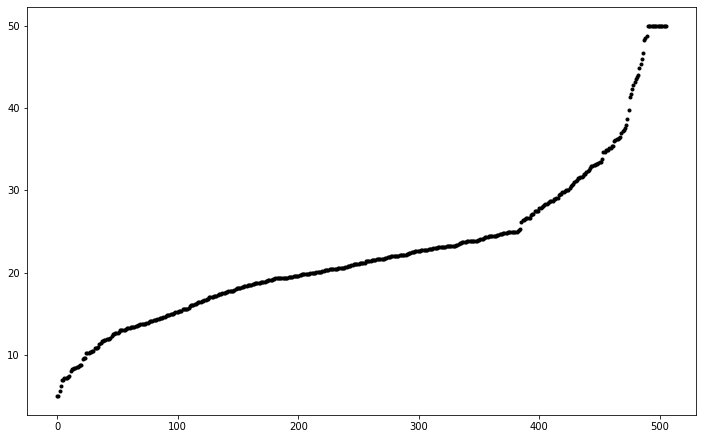

In [47]:
x = np.arange(0.0, 506, 1.0)

medv = np.sort(MEDV)

plt.plot(x, medv, 'k.', label="Data")


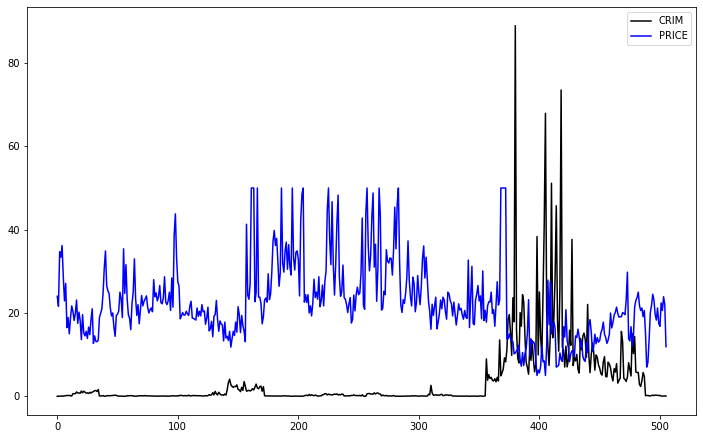

In [54]:
x = np.arange(0.0, 506, 1.0)

plt.plot(x, CRIM, 'k-', label="CRIM")
plt.plot(x, MEDV, 'b-', label="PRICE")


plt.legend()


In [39]:
# Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [40]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Visualise the median house price

In [41]:
a = df['medv']

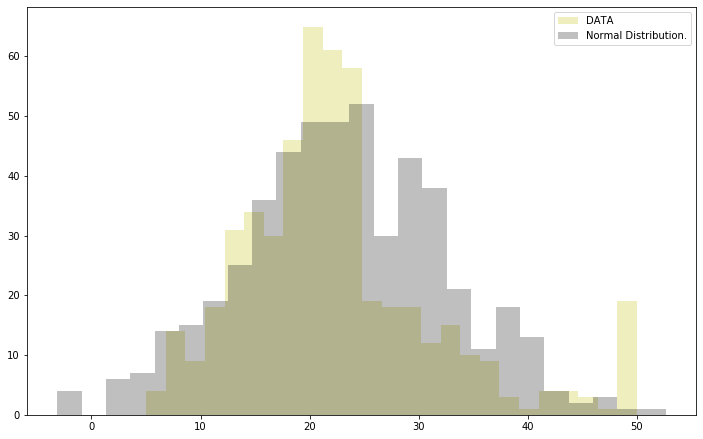

In [42]:
# Create histograms to visualise the distribution of house prices
plt.hist(a, bins=25, color='y', alpha=0.25, label="DATA")
plt.hist(np.random.normal(22.53, 9.2, 505), color='k', alpha=0.25, bins = 25, label = "Normal Distribution.")
plt.legend()
plt.show()

In [43]:
#stats.f_oneway(df['petal_length'], r['petal_length'], a['petal_length'])

## Describe Statistics of Data set

In [44]:
a.mean(), a.min(), a.max(), a.std()
    

(22.532806324110698, 5.0, 50.0, 9.19710408737982)

## Plots to Describe the Data Set 

## Charles River Impact

### Analysis
Use inferential statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t.

### Discussion

## Model
Use keras to create a neural network that can predict the median house price based on the other variables in the dataset

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System

TensorFlow 2 and Keras installed on machine.
TensorFlow CPU environment is required running to run keras???

In [45]:
import keras
import tensorflow as tf

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

## References

1. Data Set from Github, https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv 
2. Keras, https://keras.io/#getting-started-30-seconds-to-keras
3. Data Set CSO, https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## Assignment:
https://github.com/ianmcloughlin/project-2019-machstat/raw/master/project.pdf